## Analysis of Stock Market Data

### Importing necessary packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Loading the data

In [2]:
# Load data from the csv file
df = pd.read_csv('stock_data.csv', index_col=None)

### Understand the variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
Index,13,"[HSI, NYA, IXIC, 000001.SS, N225, N100, 399001...",Ticker symbol for indexes
Date,14657,"[1986-12-31, 1987-01-02, 1987-01-05, 1987-01-0...",Date of observation
Open,96716,"[2568.300049, 2540.100098, 2552.399902, 2583.8...",Opening price
High,96830,"[2568.300049, 2540.100098, 2552.399902, 2583.8...",Highest price during trading day
Low,96663,"[2568.300049, 2540.100098, 2552.399902, 2583.8...",Lowest price during trading day
Close,96764,"[2568.300049, 2540.100098, 2552.399902, 2583.8...",Close price
Adj Close,97602,"[2568.300049, 2540.100098, 2552.399902, 2583.8...",Closing price adjusted for dividends and stock...
Volume,50561,"[0.0, 257038800.0, 134407800.0, 195057600.0, 1...",Number of shares traded during trading day
CloseUSD,99179,"[333.87900637, 330.21301274, 331.81198726, 335...",Close price in terms of USD


### Exploratory Analysis of the Data

In [4]:
# descriptive statistics
display(df.describe())

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [5]:
#checking first few rows of the data
display(df.head(10))

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
5,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0,338.429006
6,HSI,1987-01-09,2561.699951,2561.699951,2561.699951,2561.699951,2561.699951,0.0,333.020994
7,HSI,1987-01-12,2614.899902,2614.899902,2614.899902,2614.899902,2614.899902,0.0,339.936987
8,HSI,1987-01-13,2590.800049,2590.800049,2590.800049,2590.800049,2590.800049,0.0,336.804006
9,HSI,1987-01-14,2578.199951,2578.199951,2578.199951,2578.199951,2578.199951,0.0,335.165994


In [6]:
#data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


None

In [7]:
# converting Date from object type to Datetime type
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      104224 non-null  object        
 1   Date       104224 non-null  datetime64[ns]
 2   Open       104224 non-null  float64       
 3   High       104224 non-null  float64       
 4   Low        104224 non-null  float64       
 5   Close      104224 non-null  float64       
 6   Adj Close  104224 non-null  float64       
 7   Volume     104224 non-null  float64       
 8   CloseUSD   104224 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 7.2+ MB


In [8]:
#checking null values
df.isna().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
df.sort_values('Date')

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
40920,N225,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0,12.577200
40921,N225,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0,12.639900
40922,N225,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0,12.742700
40923,N225,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0,12.864301
40924,N225,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0,12.885400
...,...,...,...,...,...,...,...,...,...
66026,399001.SZ,2021-06-01,14963.950200,15039.019530,14820.740230,15034.780270,15034.780270,1515600.0,2405.564843
66027,399001.SZ,2021-06-02,15044.940430,15051.209960,14793.740230,14857.910160,14857.910160,1470800.0,2377.265626
54792,N225,2021-06-02,28730.810550,29003.550780,28565.830080,28946.140630,28946.140630,71000000.0,289.461406
60267,N100,2021-06-02,1258.489990,1263.709961,1258.239990,1263.619995,1263.619995,148465000.0,1541.616394


In [11]:
df['Index'].value_counts()

NYA          13947
N225         13874
IXIC         12690
GSPTSE       10526
HSI           8492
GDAXI         8438
SSMI          7671
TWII          5869
000001.SS     5791
399001.SZ     5760
N100          5474
NSEI          3346
J203.JO       2346
Name: Index, dtype: int64

The index names are not very intuitive, creating a dictionary to store their more known name. This will involve doing some desktop reserch on the index ticker symbol to get to their common name

In [12]:
index_country = {'NYA':'New York Stock Exchange','N225':'Nikkei 225','IXIC':'Nasdaq','GSPTSE':'S&P TSX','HSI':'Heng Seng Index',\
                'GDAXI':'Dax Performance Index','SSMI':'Swiss Market Index','TWII':'Taiwan Weighted Index','000001.SS':'Sanghai Stock Exchange',\
                '399001.SZ':'Shenzen Component','N100':'Euronext 100','NSEI':'Nifty 50','J203.JO':'Johannesburg Index'}

In [13]:
index_country

{'NYA': 'New York Stock Exchange',
 'N225': 'Nikkei 225',
 'IXIC': 'Nasdaq',
 'GSPTSE': 'S&P TSX',
 'HSI': 'Heng Seng Index',
 'GDAXI': 'Dax Performance Index',
 'SSMI': 'Swiss Market Index',
 'TWII': 'Taiwan Weighted Index',
 '000001.SS': 'Sanghai Stock Exchange',
 '399001.SZ': 'Shenzen Component',
 'N100': 'Euronext 100',
 'NSEI': 'Nifty 50',
 'J203.JO': 'Johannesburg Index'}

Adding the common names to the data

In [14]:
df['Index_Name']=df['Index'].replace(index_country)

In [15]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Heng Seng Index
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Heng Seng Index
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Heng Seng Index
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Heng Seng Index
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Heng Seng Index


In [16]:
df.groupby(['Index','Index_Name']).sum()

,,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Index,Index_Name,,,,,,,
000001.SS,Sanghai Stock Exchange,1.378958e+07,1.391069e+07,1.366066e+07,1.380035e+07,1.380035e+07,6.169757e+08,2.208057e+06
399001.SZ,Shenzen Component,4.589764e+07,4.638474e+07,4.540050e+07,4.592927e+07,4.592885e+07,1.440156e+09,7.348683e+06
GDAXI,Dax Performance Index,4.991540e+07,5.026467e+07,4.952871e+07,4.990948e+07,4.990948e+07,5.763478e+11,6.088956e+07
GSPTSE,S&P TSX,8.516699e+07,8.555560e+07,8.471628e+07,8.515604e+07,8.513518e+07,1.012654e+14,7.067951e+07
HSI,Heng Seng Index,1.291324e+08,1.299584e+08,1.281532e+08,1.290835e+08,1.290835e+08,7.158918e+12,1.678086e+07
IXIC,Nasdaq,2.518999e+07,2.535526e+07,2.499910e+07,2.518847e+07,2.518847e+07,1.258249e+13,2.518847e+07
J203.JO,Johannesburg Index,1.194037e+08,1.201627e+08,1.186836e+08,1.194371e+08,1.194371e+08,0.000000e+00,8.360596e+06
N100,Euronext 100,4.501059e+06,4.525959e+06,4.473228e+06,4.500469e+06,4.500469e+06,1.071933e+12,5.490573e+06
N225,Nikkei 225,1.783126e+08,1.792478e+08,1.772908e+08,1.782692e+08,1.782692e+08,5.516703e+11,1.782692e+06


Adding a column that measure biggest movement in a day

In [17]:
df['Movement']=df['High']-df['Low']

Now that we have cleaned the data, let's plot a small multiple charts to have a glimpse of how various indices have performed over the years.

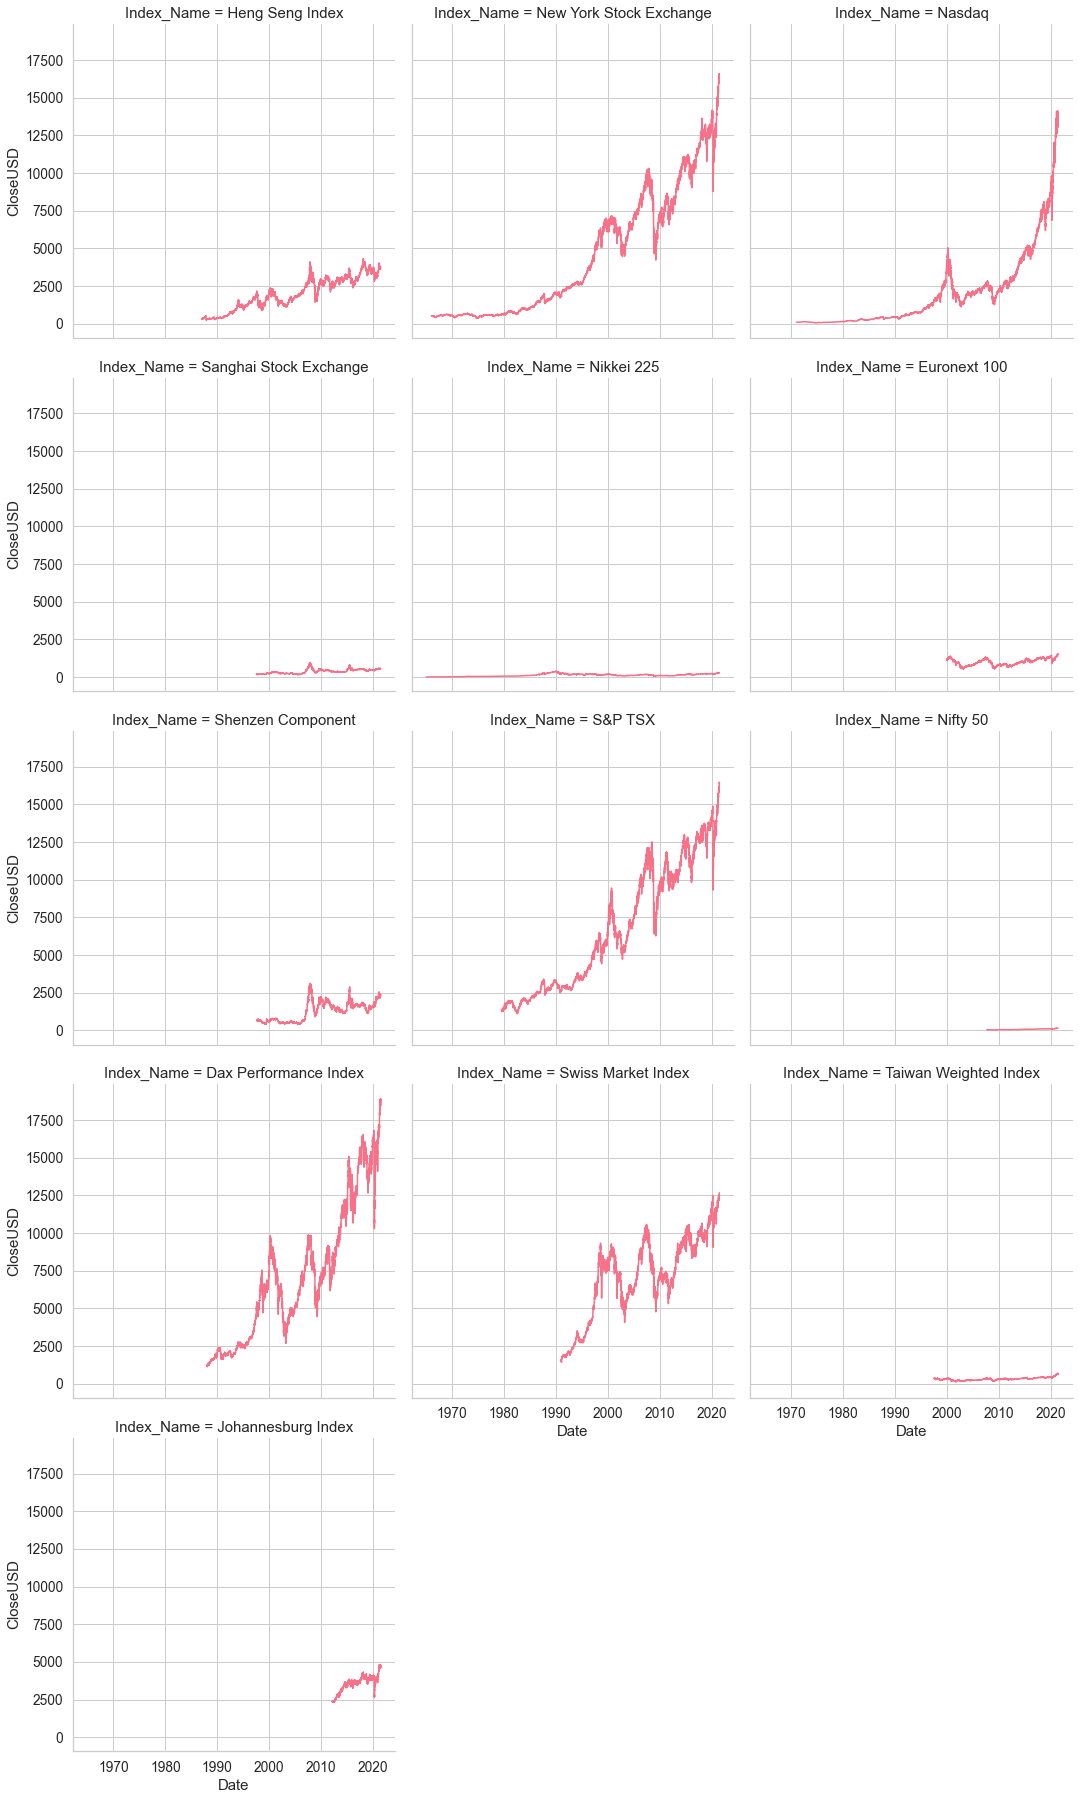

In [18]:
sns.set(style='whitegrid',font_scale=1.25)
sns.set_palette('husl',3)
sns.relplot(x='Date',y='CloseUSD', kind ='line',data=df,col='Index_Name',col_wrap=3)
plt.show()

Clearly American stock market have outperformed others over the years. Nikkei and Nifty being the most flat. German (DAX) and Swiss market seems to follow similar trend as American Market

### A Closer Look at American Market

In [19]:
American_Market = df[df['Index'].isin(['GSPTSE','IXIC','NYA'])]

In [20]:
American_Market.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name,Movement
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002,New York Stock Exchange,0.0
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,New York Stock Exchange,0.0
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,New York Stock Exchange,0.0
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,New York Stock Exchange,0.0
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,New York Stock Exchange,0.0
8497,NYA,1966-01-07,532.599976,532.599976,532.599976,532.599976,532.599976,0.0,532.599976,New York Stock Exchange,0.0
8498,NYA,1966-01-10,533.869995,533.869995,533.869995,533.869995,533.869995,0.0,533.869995,New York Stock Exchange,0.0
8499,NYA,1966-01-11,534.289978,534.289978,534.289978,534.289978,534.289978,0.0,534.289978,New York Stock Exchange,0.0
8500,NYA,1966-01-12,533.340027,533.340027,533.340027,533.340027,533.340027,0.0,533.340027,New York Stock Exchange,0.0
8501,NYA,1966-01-13,534.400024,534.400024,534.400024,534.400024,534.400024,0.0,534.400024,New York Stock Exchange,0.0


In [21]:
American_Market=American_Market.sort_values('Date')

In [22]:
American_Market.corr()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Movement
Open,1.000000,0.999969,0.999948,0.999927,0.999926,0.754776,0.991351,0.640938
High,0.999969,1.000000,0.999923,0.999954,0.999954,0.755789,0.991397,0.644382
Low,0.999948,0.999923,1.000000,0.999960,0.999960,0.753167,0.991391,0.634874
Close,0.999927,0.999954,0.999960,1.000000,1.000000,0.754430,0.991450,0.639234
Adj Close,0.999926,0.999954,0.999960,1.000000,1.000000,0.754458,0.991459,0.639249
Volume,0.754776,0.755789,0.753167,0.754430,0.754458,1.000000,0.689776,0.645550
CloseUSD,0.991351,0.991397,0.991391,0.991450,0.991459,0.689776,1.000000,0.634510
Movement,0.640938,0.644382,0.634874,0.639234,0.639249,0.645550,0.634510,1.000000


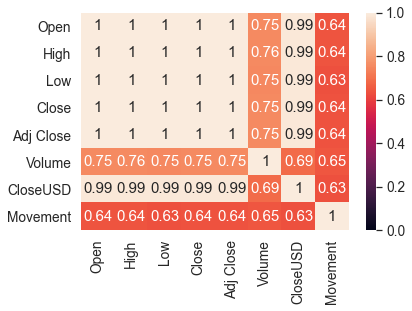

In [23]:
sns.heatmap(American_Market.corr(),vmin=0,vmax=1,annot=True)
plt.show()

All the datapoints are highly correlated,Volume and Movement being the least correlated datapoints

### Volatile days (Intraday Swings)

In [24]:
American_Market.nlargest(20,'Movement')

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name,Movement
73385,GSPTSE,2008-10-14,10773.099610,10773.099610,9065.200195,9955.700195,9955.700195,3.946071e+10,8263.231162,S&P TSX,1707.899415
22134,NYA,2020-03-16,10851.980470,10851.980470,9559.230469,9567.530273,9567.530273,7.781540e+09,9567.530273,New York Stock Exchange,1292.750001
76257,GSPTSE,2020-03-25,12588.099610,13690.400390,12496.299810,13139.200200,13139.200200,5.531268e+10,10905.536166,S&P TSX,1194.100580
73380,GSPTSE,2008-10-06,10445.000000,10803.400390,9617.900391,10230.400390,10230.400390,3.984022e+10,8491.232324,S&P TSX,1185.499999
76248,GSPTSE,2020-03-12,13611.799810,13611.799810,12451.099610,12508.500000,12508.500000,6.783329e+10,10382.055000,S&P TSX,1160.700200
76252,GSPTSE,2020-03-18,12197.700200,12500.000000,11384.099610,11721.400390,11721.400390,5.894370e+10,9728.762324,S&P TSX,1115.900390
76249,GSPTSE,2020-03-13,13161.599610,13716.299810,12608.299810,13716.299810,13716.299810,6.693287e+10,11384.528842,S&P TSX,1108.000000
20577,NYA,2014-01-07,11315.370120,11334.650390,10309.040040,10327.330080,10327.330080,3.511750e+09,10327.330080,New York Stock Exchange,1025.610350
76250,GSPTSE,2020-03-16,12648.700200,12851.700200,11883.700200,12360.400390,12360.400390,5.256683e+10,10259.132324,S&P TSX,968.000000
73375,GSPTSE,2008-09-29,11987.099610,12126.000000,11171.299810,11285.099610,11285.099610,2.889537e+10,9366.632676,S&P TSX,954.700190


2008 recession and 2020 Covid 19 pandemic produced a few of the most volatile days in the stock market.Apart from these black swan events, do we have certain months or days of week generally where American Markets have high volatility?

In [25]:
American_Market['Month']=American_Market['Date'].dt.month

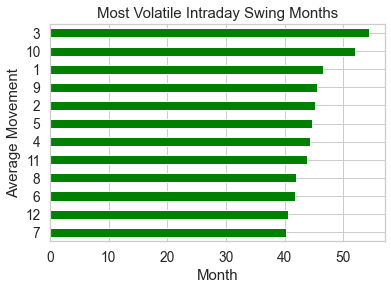

In [26]:
American_Market.groupby(['Month'])['Movement'].mean().sort_values().plot(kind='barh',color ='green')
plt.xlabel('Month')
plt.ylabel('Average Movement')
plt.title('Most Volatile Intraday Swing Months')
plt.show()

March, October,January are top three most volatile swing months based on the difference between intraday high and low. June, December and July being least volatile. How about weeks?

In [27]:
American_Market['weekday']=American_Market['Date'].dt.weekday

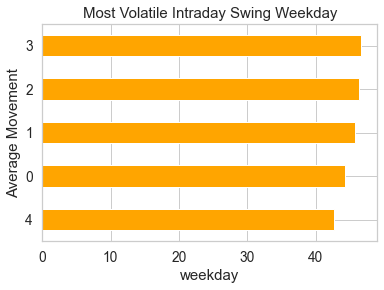

In [28]:
American_Market.groupby(['weekday'])['Movement'].mean().sort_values().plot(kind='barh',color ='orange')
plt.xlabel('weekday')
plt.ylabel('Average Movement')
plt.title('Most Volatile Intraday Swing Weekday')
plt.show()

Wednesday and Thursday are most volatile days of the week. (0 = Monday, 1 = Tuesday, 2 = Wednesday, 3= Thursday and 4 = Friday)

Calculating how many times market moved higher from it's previous day close.

In [29]:
American_Market['Shift']=American_Market['CloseUSD'].shift(1)-American_Market['CloseUSD']

In [30]:
American_Market.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name,Movement,Month,weekday,Shift
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002,New York Stock Exchange,0.0,12,4,NaN
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,New York Stock Exchange,0.0,1,0,1.479980
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,New York Stock Exchange,0.0,1,1,-0.630005
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,New York Stock Exchange,0.0,1,2,-3.279968
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,New York Stock Exchange,0.0,1,3,-0.950012
8497,NYA,1966-01-07,532.599976,532.599976,532.599976,532.599976,532.599976,0.0,532.599976,New York Stock Exchange,0.0,1,4,-0.529969
8498,NYA,1966-01-10,533.869995,533.869995,533.869995,533.869995,533.869995,0.0,533.869995,New York Stock Exchange,0.0,1,0,-1.270019
8499,NYA,1966-01-11,534.289978,534.289978,534.289978,534.289978,534.289978,0.0,534.289978,New York Stock Exchange,0.0,1,1,-0.419983
8500,NYA,1966-01-12,533.340027,533.340027,533.340027,533.340027,533.340027,0.0,533.340027,New York Stock Exchange,0.0,1,2,0.949951
8501,NYA,1966-01-13,534.400024,534.400024,534.400024,534.400024,534.400024,0.0,534.400024,New York Stock Exchange,0.0,1,3,-1.059997


In [31]:
American_Market.tail(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name,Movement,Month,weekday,Shift
22436,NYA,2021-05-26,16390.18945,16466.33984,16388.32031,16451.96094,16451.96094,3.674490e+09,16451.960940,New York Stock Exchange,78.01953,5,2,-213.758264
35126,IXIC,2021-05-26,13693.94043,13750.16016,13679.58984,13738.00000,13738.00000,4.231140e+09,13738.000000,Nasdaq,70.57032,5,2,2713.960940
76550,GSPTSE,2021-05-26,19654.19922,19763.69922,19634.59961,19745.50000,19745.50000,2.281863e+10,16388.765000,S&P TSX,129.09961,5,2,-2650.765000
76551,GSPTSE,2021-05-27,19768.09961,19835.30078,19752.50000,19774.40039,19774.40039,4.650791e+10,16412.752324,S&P TSX,82.80078,5,3,-23.987324
35127,IXIC,2021-05-27,13742.58984,13776.51953,13701.62988,13736.28027,13736.28027,5.057550e+09,13736.280270,Nasdaq,74.88965,5,3,2676.472054
22437,NYA,2021-05-27,16451.96094,16546.35938,16451.96094,16531.94922,16531.94922,5.201110e+09,16531.949220,New York Stock Exchange,94.39844,5,3,-2795.668950
22438,NYA,2021-05-28,16531.94922,16588.68945,16531.94922,16555.66016,16555.66016,4.199270e+09,16555.660160,New York Stock Exchange,56.74023,5,4,-23.710940
76552,GSPTSE,2021-05-28,19876.50000,19904.80078,19841.00000,19852.19922,19852.19922,2.270018e+10,16477.325353,S&P TSX,63.80078,5,4,78.334807
35128,IXIC,2021-05-28,13792.04981,13820.87012,13747.61035,13748.74023,13748.74023,4.435220e+09,13748.740230,Nasdaq,73.25977,5,4,2728.585123
76553,GSPTSE,2021-05-31,19905.80078,19909.59961,19705.80078,19731.00000,19731.00000,1.022570e+10,16376.730000,S&P TSX,203.79883,5,0,-2627.989770


In [32]:
American_Market['Up']=American_Market['Shift']>=0

In [33]:
American_Market['Up'].value_counts(normalize =True)

False    0.50588
True     0.49412
Name: Up, dtype: float64

Markets have gone up the next day only 49.41% of the times vs it has gone down 50.59% of the times the next day

In [34]:
pd.crosstab(American_Market['Up'],American_Market['weekday'],normalize='columns')

weekday,0,1,2,3,4
Up,,,,,
False,0.492787,0.500921,0.511512,0.506658,0.516718
True,0.507213,0.499079,0.488488,0.493342,0.483282


By a very small percentage only on Monday market goes vs how it closed the previous Friday.

In [35]:
pd.crosstab(American_Market['Up'],American_Market['Month'],normalize='columns')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Up,,,,,,,,,,,,
False,0.513741,0.503307,0.510429,0.50925,0.504295,0.504323,0.50677,0.496105,0.500335,0.503429,0.50612,0.51241
True,0.486259,0.496693,0.489571,0.49075,0.495705,0.495677,0.49323,0.503895,0.499665,0.496571,0.49388,0.48759


Aggregation of number of UP days don't make much sense, but for kicks ang giggles we can see only August has more than 50% of such days.

In [36]:
American_Market['Daily_Delta']=American_Market['Close']-American_Market['Open']
American_Market['Year']=American_Market['Date'].dt.year


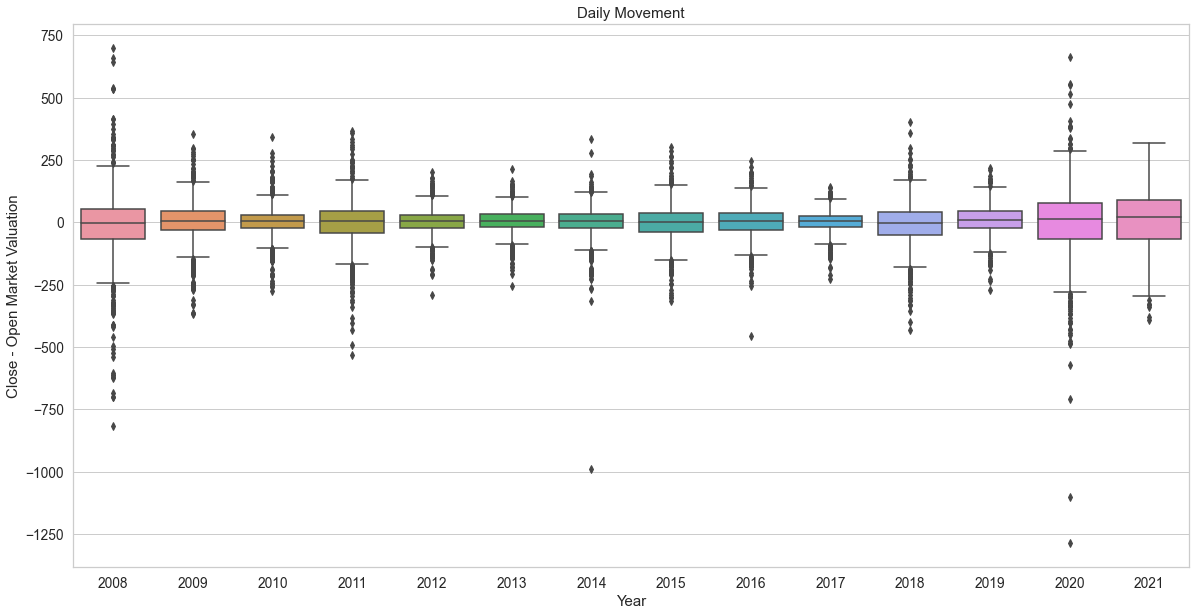

In [37]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Year',y='Daily_Delta',data=American_Market[American_Market['Year']>2007])
ax.set(xlabel='Year',ylabel='Close - Open Market Valuation',title='Daily Movement')
plt.show()

Clearly stocks had wild movement in 2008 and 2020.

<Figure size 2880x4320 with 0 Axes>

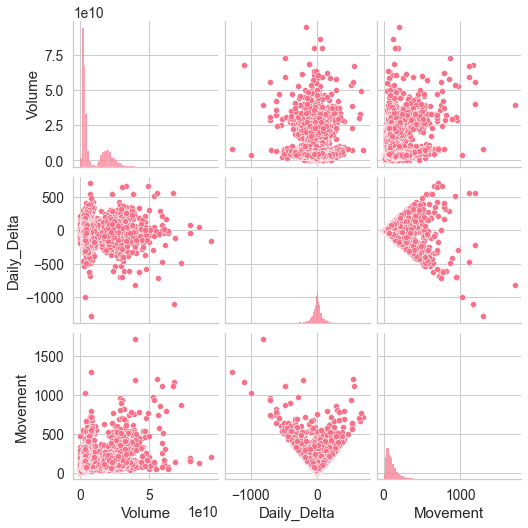

In [62]:
plt.figure(figsize=(40,60))
sns.pairplot(American_Market.loc[American_Market['Year']>2007,['Volume','Daily_Delta','Movement']],kind='scatter',diag_kind='hist')
plt.show()

In [39]:
Move_Up = American_Market[['Date','Daily_Delta','weekday','Month','Year']].nlargest(200,'Daily_Delta')

In [40]:
Move_Up.reset_index(inplace=True)

In [41]:
Move_down = American_Market[['Date','Daily_Delta','weekday','Month','Year']].nsmallest(200,'Daily_Delta')

In [42]:
Move_down.reset_index(inplace=True)

In [43]:
biggest_moving_days = pd.concat([Move_Up,Move_down])

In [44]:
biggest_moving_days.reset_index(inplace=True)

In [45]:
biggest_moving_days['Date'].agg({'max','min'})

max   2021-05-19
min   1987-10-19
Name: Date, dtype: datetime64[ns]

Best day in US Stock market was in 2021-05-19 and worst day in 1987-10-19

In [46]:
biggest_moving_days.describe()

,level_0,index,Daily_Delta,weekday,Month,Year
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,99.500000,48227.777500,-35.105848,1.877500,6.470000,2011.837500
std,57.806609,25583.450538,337.945268,1.331136,3.505685,6.548152
min,0.000000,18684.000000,-1284.450197,0.000000,1.000000,1987.000000
25%,49.750000,20060.500000,-310.115112,1.000000,3.000000,2008.000000
50%,99.500000,35091.500000,-25.830566,2.000000,7.000000,2010.000000
75%,149.250000,73443.000000,254.925110,3.000000,10.000000,2020.000000
max,199.000000,76470.000000,696.830078,4.000000,12.000000,2021.000000


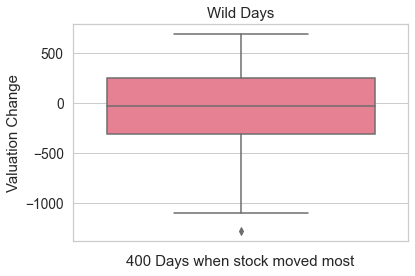

In [47]:
ax1=sns.boxplot(y='Daily_Delta',data=biggest_moving_days)
ax1.set(xlabel='400 Days when stock moved most',ylabel='Valuation Change',title='Wild Days')
plt.show()

### Creating Outcome Varaible

For our model we will prepare the data in a way so that future close usd value is mapped to the current stock market activity. We will move the CloseUSD a row above and map it to the current activity of the stock

In [48]:
American_Market['Future']=American_Market['CloseUSD'].shift(-1)

In [49]:
American_Market.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_Name,Movement,Month,weekday,Shift,Up,Daily_Delta,Year,Future
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002,New York Stock Exchange,0.0,12,4,NaN,False,0.0,1965,527.210022
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,New York Stock Exchange,0.0,1,0,1.479980,True,0.0,1966,527.840027
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,New York Stock Exchange,0.0,1,1,-0.630005,False,0.0,1966,531.119995
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,New York Stock Exchange,0.0,1,2,-3.279968,False,0.0,1966,532.070007
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,New York Stock Exchange,0.0,1,3,-0.950012,False,0.0,1966,532.599976


In [50]:
American_Market_Model=American_Market[['Volume','Future','Daily_Delta','Movement']].reset_index()

In [51]:
display(American_Market_Model.head())
American_Market_Model.dropna(inplace=True)

,index,Volume,Future,Daily_Delta,Movement
0,8492,0.0,527.210022,0.0,0.0
1,8493,0.0,527.840027,0.0,0.0
2,8494,0.0,531.119995,0.0,0.0
3,8495,0.0,532.070007,0.0,0.0
4,8496,0.0,532.599976,0.0,0.0


In [52]:
y=American_Market_Model['Future']
X=American_Market_Model.drop('Future',axis=1)
scaler=StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [53]:
X_train,X_test,y_train,y_test =train_test_split(X_Scaled,y,test_size=0.3,random_state=45)

In [54]:
reg=LinearRegression()

In [55]:
reg.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=reg.predict(X_test)
y_pred

array([ 3130.18785743,  3283.05967918,  5314.95715107, ...,
       14304.92896477,  2491.83491531,  3096.13461409])

In [57]:
r_squared = r2_score(y_test,y_pred)

In [58]:
r_squared

0.23566612539977294

Model we got is not good at all. Which does make sense as predicting market movement is a near impossible task

### Conclusion

US indices have outperformed most other indices of the world. With some wild days in 2008 and 2020. Worst day in stock market was October 19, 1987, crash, also called the black Monday. Intraday volatility is relatively higher for mid of week versus Monday or Friday. Summer and December have less intraday volatility. March being closer to Tax Day, have shown very high volatility. Monday is the only day in the week where market opened higher more than 50% of the times when compared to the previous day's valuation. But in general, most of the time it’s very close. All in all, there is not much of pattern on how stock market behaves, except understanding it behavior in a hindsight.

Disclaimer: This analysis is only for showcasing my data analysis skills. This shouldn't be taken as a financial advice.